# Avaliação 6 

### Mariana Yukari Yano

### 11202230644

### Questão 1

Em Física, a equação do movimento de um objeto em queda com resistência do ar proporcional à velocidade pode ser resolvida numericamente. Esse problema é comum em simulações, e diferentes implementações podem ter desempenhos bem distintos.

Neste exercício, você implementará três abordagens para resolver o mesmo problema físico e medirá os tempos de execução.

**a) O problema físico**

Considere a equação do movimento de um corpo em queda com resistência do ar linear:

$\frac{dv}{dt} = g - kv$ 

$\frac{dx}{dt} = v$

com:

  - $g: 9,8$ $m/s^2$

  - $k = 0,1$ $s^-1$
  
  - $v(0) = 0$, $x(0) = 0$

Você deve calcular numericamente a posição $x(t)$ de um objeto em queda até $t=10s$.

**b) Três métodos numéricos**

Implemente os seguintes métodos para resolver o problema:

1. Euler explícito  

2. Euler com lista de armazenagem ('append')  

3. Euler com pré-alocação (usando 'numpy')

Use Δt=0,001s para todos os métodos.

**c) Comparando tempos de execução**

- Meça o tempo total para cada método com 'time.time()'.

- Plote o tempo de execução versus o número de passos (N) para $N=10^3, 10^4, 10^5, 10^6$

- Use 'matplotlib' com eixos log-log.

**d) (Exploração mais desafiadora)**

- Compare o desempenho do método de Euler com um método mais preciso (como o de Runge-Kutta 4ª ordem) para o mesmo problema.

- Meça o tempo e a diferença entre as soluções.

- Discuta: quando vale a pena usar métodos mais precisos, mesmo sendo mais lentos?


Cálculo numérico da posição x(t) até t=10s (N=100000):

Método: Euler Explícito

Tempo (s)	Posição (m)
----------------------------
0.0		0.000000
4.0		68.912331
10.0		360.520050

Método: Euler com Append

Tempo (s)	Posição (m)
----------------------------
0.0		0.000000
4.0		68.915562
10.0		360.526245

Método: Euler com NumPy

Tempo (s)	Posição (m)
----------------------------
0.0		0.000000
2.0		18.355336
4.0		68.912331
6.0		145.833790
8.0		244.340623
10.0		360.520050

Método: RK4

Tempo (s)	Posição (m)
----------------------------
0.0		0.000000
2.0		18.356138
4.0		68.913645
6.0		145.835403
8.0		244.342385
10.0		360.521852


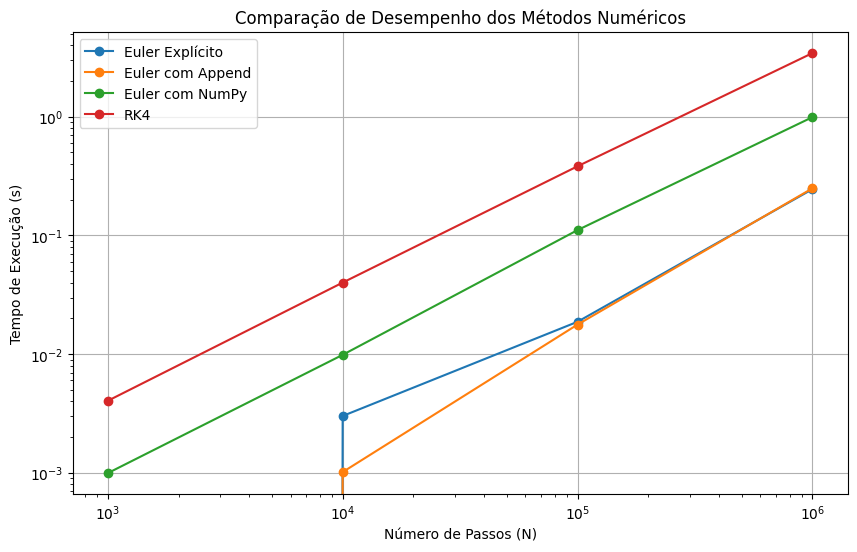


Tempos de execução (s):

Euler Explícito:
N = 1000: 0.000000
N = 10000: 0.003014
N = 100000: 0.018739
N = 1000000: 0.245243

Euler com Append:
N = 1000: 0.000000
N = 10000: 0.001015
N = 100000: 0.017748
N = 1000000: 0.249410

Euler com NumPy:
N = 1000: 0.000995
N = 10000: 0.009869
N = 100000: 0.110918
N = 1000000: 0.991853

RK4:
N = 1000: 0.004047
N = 10000: 0.040076
N = 100000: 0.382579
N = 1000000: 3.436902


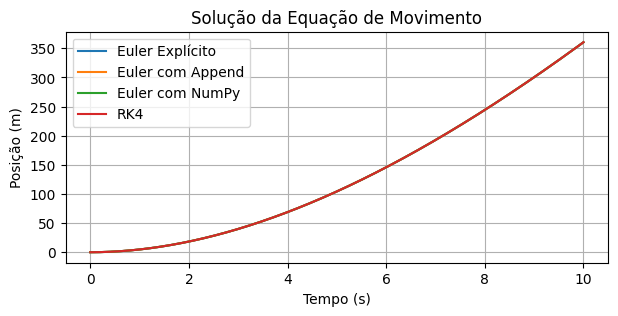

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parâmetros físicos
g = 9.8  # m/s²
k = 0.1  # s⁻¹
v0 = 0.0  # m/s
x0 = 0.0  # m
t_max = 10.0  # s

# Método Euler Explícito - Retorna (tempos, posições, tempo_exec)
def euler_explicito(g, k, dt, t_max):
    start_time = time.time()
    t = 0.0
    v = v0
    x = x0
    tempos = [t]
    posicoes = [x]
    
    while t <= t_max:
        v_new = v + (g - k * v) * dt
        x_new = x + v * dt
        v, x = v_new, x_new
        t += dt
        tempos.append(t)
        posicoes.append(x)
    
    execution_time = time.time() - start_time
    return np.array(tempos), np.array(posicoes), execution_time

# Método Euler com Append - Retorna (tempos, posições, tempo_exec)
def euler_append(g, k, dt, t_max):
    start_time = time.time()
    t = 0.0
    v = v0
    x = x0
    tempos = [t]
    posicoes = [x]
    
    while t <= t_max:
        v = v + (g - k * v) * dt
        x = x + v * dt
        t += dt
        tempos.append(t)
        posicoes.append(x)
    
    execution_time = time.time() - start_time
    return np.array(tempos), np.array(posicoes), execution_time

# Método Euler com NumPy - Retorna (tempos, posições, tempo_exec)
def euler_numpy(g, k, dt, t_max):
    start_time = time.time()
    N = int(t_max / dt)
    tempos = np.linspace(0, t_max, N+1)
    v = np.zeros(N+1)
    x = np.zeros(N+1)
    v[0] = v0
    x[0] = x0
    
    for i in range(N):
        v[i+1] = v[i] + (g - k * v[i]) * dt
        x[i+1] = x[i] + v[i] * dt
    
    execution_time = time.time() - start_time
    return tempos, x, execution_time

# Método RK4 - Retorna (tempos, posições, tempo_exec)
def rk4(g, k, dt, t_max):
    start_time = time.time()
    N = int(t_max / dt)
    tempos = np.linspace(0, t_max, N+1)
    v = np.zeros(N+1)
    x = np.zeros(N+1)
    v[0] = v0
    x[0] = x0
    
    for i in range(N):
        k1_v = (g - k * v[i]) * dt
        k1_x = v[i] * dt

        k2_v = (g - k * (v[i] + k1_v/2)) * dt
        k2_x = (v[i] + k1_v/2) * dt

        k3_v = (g - k * (v[i] + k2_v/2)) * dt
        k3_x = (v[i] + k2_v/2) * dt

        k4_v = (g - k * (v[i] + k3_v)) * dt
        k4_x = (v[i] + k3_v) * dt

        v[i+1] = v[i] + (k1_v + 2*k2_v + 2*k3_v + k4_v)/6
        x[i+1] = x[i] + (k1_x + 2*k2_x + 2*k3_x + k4_x)/6
    
    execution_time = time.time() - start_time
    return tempos, x, execution_time

def imprimir_posicoes(tempos, posicoes, intervalo=1.0):
    """Imprime a posição x(t) em intervalos regulares"""
    print("\nTempo (s)\tPosição (m)")
    print("----------------------------")
    for t, x in zip(tempos, posicoes):
        if t % intervalo < 1e-6 or abs(t - t_max) < 1e-6:  # Verifica intervalos e o tempo final
            print(f"{t:.1f}\t\t{x:.6f}")
    
# Configurações
methods = {
    "Euler Explícito": euler_explicito,
    "Euler com Append": euler_append,
    "Euler com NumPy": euler_numpy,
    "RK4": rk4
}
N_values = [10**3, 10**4, 10**5, 10**6]
time_results = {method: [] for method in methods}

# Execução principal
dt_plot = t_max / 10**5
print("\nCálculo numérico da posição x(t) até t=10s (N=100000):")
print("===================================================")

for method_name, method_func in methods.items():
    t, x, _ = method_func(g, k, dt_plot, t_max)
    print(f"\nMétodo: {method_name}")
    imprimir_posicoes(t, x, intervalo=2.0)  # Altere o intervalo se desejar

# Valores de N para teste
N_values = [10**3, 10**4, 10**5, 10**6]

# Dicionário de métodos
methods = {
    "Euler Explícito": euler_explicito,
    "Euler com Append": euler_append,
    "Euler com NumPy": euler_numpy,
    "RK4": rk4
}

# Armazenar resultados
time_results = {method: [] for method in methods}
solucoes = {method: None for method in methods}

# Executar simulações para N = 10^5 (para plotar)
dt_plot = t_max / 10**5
for method_name, method_func in methods.items():
    t, x, _ = method_func(g, k, dt_plot, t_max)
    solucoes[method_name] = (t, x)

# Comparar desempenho para diferentes N
for N in N_values:
    dt = t_max / N
    for method_name, method_func in methods.items():
        _, _, exec_time = method_func(g, k, dt, t_max)
        time_results[method_name].append(exec_time)

# Gráfico de desempenho (log-log) - Versão idêntica ao primeiro código
plt.figure(figsize=(10, 6))
for method_name, times in time_results.items():
    plt.loglog(N_values, times, marker='o', label=method_name)

plt.xlabel("Número de Passos (N)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação de Desempenho dos Métodos Numéricos")
plt.grid(True)
plt.legend()
plt.show()

# Gráfico das soluções
plt.figure(figsize=(7, 3))
for method_name, (t, x) in solucoes.items():
    plt.plot(t, x, label=method_name)
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Solução da Equação de Movimento')
plt.grid(True)
plt.legend()

# Gráfico de desempenho

# Imprimir tempos de execução
print("\nTempos de execução (s):")
for method in methods:
    print(f"\n{method}:")
    for N, t in zip(N_values, time_results[method]):
        print(f"N = {N}: {t:.6f}")

Métodos mais precisos como o RK4 valem a pena quando o problema exige alta fidelidade, como em sistemas rígidos, caóticos, de longa duração ou sensíveis a pequenas variações. Eles reduzem o acúmulo de erro e preservam melhor quantidades físicas, mesmo com passos de tempo maiores. Embora mais lentos por passo, podem ser mais eficientes que métodos simples como Euler, que exigem muitos passos para manter a estabilidade. Por outro lado, em problemas simples, com soluções conhecidas, baixa sensibilidade ou exigência de tempo real, métodos como Euler são suficientes e mais rápidos.


### Problema 2

O cancelamento subtrativo ocorre frequentemente quando somamos termos de sinais opostos, o que pode resultar em perda de precisão significativa em representações com ponto flutuante.

Neste exercício, você irá comparar três formas analíticas de calcular uma mesma soma, observando como cada uma se comporta numericamente.

O uso da linguagem Python é obrigatório. Utilize 'numpy', 'matplotlib' e outras bibliotecas padrão conforme necessário.

**a) Três formas da soma**

Considere a série abaixo:

$S^{(1)}_N = \sum_{n=1}^{2N} \frac{(-1)^n \cdot n}{n+1}$

Esta soma pode ser reescrita agrupando os termos com $n$ ímpar e par separadamente, resultando em:

$S^{(2)}_N = -\sum_{n=1}^{N} \frac{2n - 1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n + 1}$

E também pode ser simplificada de forma analítica em uma expressão com apenas termos positivos:

$S^{(3)}_N = \sum_{n=1}^{N} \frac{1}{2n(2n + 1)}$

Embora as expressões $S^{(1)}_N, S^{(2)}_N$ e $S^{(3)}_N$ sejam matematicamente equivalentes, elas podem produzir resultados numéricos diferentes.

Tarefa:

Escreva um programa Python (precisão simples) que calcule as três expressões para diferentes valores de N.

**b) Análise de erro relativo**

Assuma que $S^{(3)}_N$ representa a “resposta exata” para cada $N$. Para cada valor de $N$, calcule:

$\text{Erro relativo} = \left| \frac{S^{(1)}_N - S^{(3)}_N}{S^{(3)}_N} \right|$

Plote o erro relativo em escala log-log (ou seja, ambos os eixos em escala logarítmica) para $N$ variando de $1$ até $10^6$. Utilize a relação:

$\log_{10}(x) = \frac{\ln(x)}{\ln(10)}$

O negativo do valor da ordenada nesse gráfico indica aproximadamente o número de algarismos significativos corretos na resposta.

**c) Interpretação do comportamento do erro**

Analise o gráfico gerado na parte (b). Responda:

- Existe uma região em que o erro relativo se comporta como uma reta?
- Isso indica que o erro é proporcional a uma potência de $N$?
- Se sim, qual a inclinação aproximada da reta nessa região?

Resultados das três formas de cálculo:
N		S₁(N)			S₂(N)			S₃(N)
----------------------------------------------------------------
1		0.16666669		0.16666669		0.16666667
10		0.28360975		0.28360975		0.28360957
100		0.30437195		0.30437195		0.30437142
1000		0.30660498		0.30660498		0.30660316
10000		0.30683470		0.30683470		0.30680069
100000		0.30685920		0.30685920		0.30680069
1000000		0.30686235		0.30686235		0.30680069

Erro Relativo para S₁(N)
N		Erro Relativo
------------------------
1		2.00000024e+00
10		2.00000072e+00
100		2.00000167e+00
1000		2.00000596e+00
10000		2.00011086e+00
100000		2.00019050e+00
1000000		2.00020099e+00


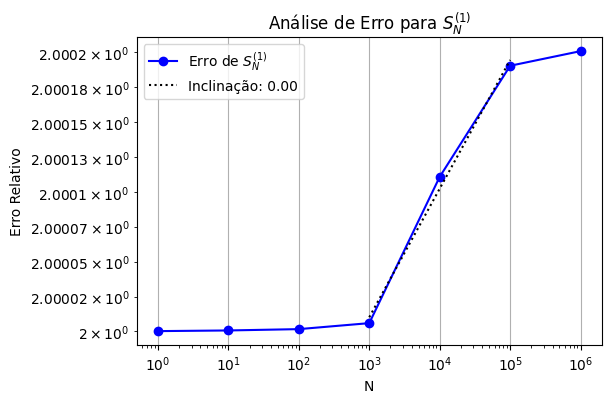

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as três formas de calcular a série
def S1(N, dtype=np.float32):
    """Forma original com cancelamento subtrativo"""
    total = dtype(0)
    for n in range(1, 2*N + 1):
        term = dtype((-1)**n * n) / dtype(n + 1)
        total += term
    return total

def S2(N, dtype=np.float32):
    """Forma separando termos pares e ímpares"""
    total = dtype(0)
    for n in range(1, N + 1):
        term_impar = -dtype(2*n - 1) / dtype(2*n)
        term_par = dtype(2*n) / dtype(2*n + 1)
        total += term_impar + term_par
    return total

def S3(N, dtype=np.float32):
    """Forma analítica sem cancelamento (referência)"""
    total = dtype(0)
    for n in range(1, N + 1):
        term = dtype(1) / (dtype(2*n) * dtype(2*n + 1))
        total += term
    return total

# Configuração da análise
N_values = np.logspace(0, 6, 100, dtype=int)  # De 1 a 1e6 em escala logarítmica
erros_S1 = []

# Valores selecionados para impressão
N_para_imprimir = [1, 10, 100, 1000, 10000, 100000, 1000000]

# 1. Primeiro imprime as três somas
print("Resultados das três formas de cálculo:")
print("N\t\tS₁(N)\t\t\tS₂(N)\t\t\tS₃(N)")
print("----------------------------------------------------------------")
for N in N_para_imprimir:
    s1 = S1(N)
    s2 = S2(N)
    s3 = S3(N)
    print(f"{N}\t\t{s1:.8f}\t\t{s2:.8f}\t\t{s3:.8f}")

# 2. Depois imprime o erro relativo para S₁
print("\nErro Relativo para S₁(N)")
print("N\t\tErro Relativo")
print("------------------------")
for N in N_para_imprimir:
    s1 = S1(N)
    s3 = S3(N)
    if s3 != 0:
        erro_relativo = np.abs((s1 - (-s3)) / s3)
    else:
        erro_relativo = 0
    print(f"{N}\t\t{erro_relativo:.8e}")
    erros_S1.append(erro_relativo)

# Plotagem dos resultados (apenas para S1)
plt.figure(figsize=(6, 4))
plt.loglog(N_para_imprimir, erros_S1, 'bo-', label='Erro de $S^{(1)}_N$')

# Análise da inclinação na região linear
if len(N_para_imprimir) > 3:
    regiao = [i for i, N in enumerate(N_para_imprimir) if 1e3 <= N <= 1e5]
    if len(regiao) > 1:
        coeffs = np.polyfit(np.log10(np.array(N_para_imprimir)[regiao]), 
                           np.log10(np.array(erros_S1)[regiao]), 1)
        plt.loglog(np.array(N_para_imprimir)[regiao], 
                 10**coeffs[1] * np.array(N_para_imprimir)[regiao]**coeffs[0], 
                 'k:', label=f'Inclinação: {coeffs[0]:.2f}')

# Configurações do gráfico
plt.xlabel('N', fontsize=10)
plt.ylabel('Erro Relativo', fontsize=10)
plt.title('Análise de Erro para $S^{(1)}_N$', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

O gráfico mostra que, entre $N \approx 10^3$ e $N \approx 10^5$, o erro relativo de $S^{(1)}_N$ segue aproximadamente uma reta em escala log-log. Esse comportamento indica que o erro é proporcional a uma potência de $N$. No entanto, a inclinação dessa reta é praticamente nula, como mostrado pela legenda do gráfico com valor 0,00. Isso significa que o erro relativo permanece praticamente constante nessa região, ou seja, ele não diminui mesmo com o aumento de $N$. Portanto, o método $S^{(1)}_N$ apresenta um erro que não melhora com refinamento, revelando baixa precisão numérica.

### Problema 3

Apesar do poder dos computadores modernos, somar uma série numérica com muitos termos pode exigir cuidado com a ordem das operações. Em ponto flutuante, a ordem em que somamos os termos pode afetar significativamente a acuracidade do resultado.

Neste exercício, o uso da linguagem Python é obrigatório. Utilize 'numpy' e 'matplotlib' conforme necessário.

**a) Soma crescente e decrescente**

Considere a seguinte soma harmônica finita:

$ S_{\text{up}} = \sum_{n=1}^{N} \frac{1}{n}, \quad
S_{\text{down}} = \sum_{n=N}^{1} \frac{1}{n}$

Matematicamente, ambas devem produzir o mesmo resultado para qualquer $N$. No entanto, ao utilizar números em ponto flutuante, pode haver diferenças devido a erros de arredondamento acumulados.

Tarefa:

- Escreva um programa em Python que calcule Sup e Sdown como função de $N$.

- Calcule o erro relativo entre as duas somas usando a expressão:

$\text{Erro relativo} = \frac{|S_{\text{up}} - S_{\text{down}}|}{|S_{\text{up}}| + |S_{\text{down}}|}$

**b) Análise gráfica do erro**

- Faça um gráfico log-log do erro relativo versus $N$, para $N$ variando de 10 até $10^7$.

- Interprete o comportamento do gráfico. Você observa uma região linear?

N		Soma Crescente		Soma Decrescente	Diferença		Erro Relativo
-----------------------------------------------------------------------------------------------------
10		2.92896825		2.92896825		0.00e+00		0.00e+00
100		5.18737752		5.18737752		-8.88e-16		8.56e-17
1000		7.48547086		7.48547086		2.66e-15		1.78e-16
10000		9.78760604		9.78760604		-3.73e-14		1.91e-15
100000		12.09014613		12.09014613		-7.28e-14		3.01e-15
1000000		14.39272672		14.39272672		-7.83e-13		2.72e-14


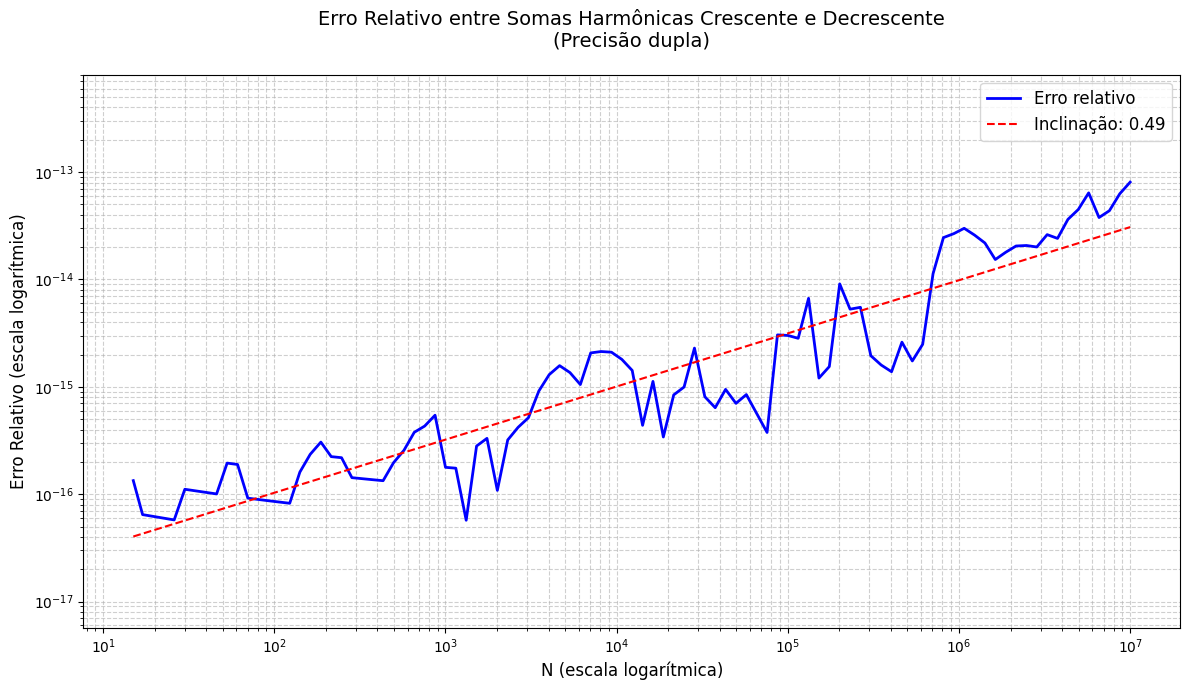

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de soma harmônica
def soma_crescente(N, dtype=np.float64):
    total = dtype(0)
    for n in range(1, N+1):
        total += dtype(1) / dtype(n)
    return total

def soma_decrescente(N, dtype=np.float64):
    total = dtype(0)
    for n in range(N, 0, -1):
        total += dtype(1) / dtype(n)
    return total

# Impressão de alguns valores
N_print = [10, 100, 1000, 10000, 100000, 1000000]
print("N\t\tSoma Crescente\t\tSoma Decrescente\tDiferença\t\tErro Relativo")
print("-----------------------------------------------------------------------------------------------------")
for N in N_print:
    sup = soma_crescente(N)
    sdown = soma_decrescente(N)
    diferenca = sup - sdown
    erro_relativo = np.abs(diferenca) / (np.abs(sup) + np.abs(sdown))
    print(f"{N}\t\t{sup:.8f}\t\t{sdown:.8f}\t\t{diferenca:.2e}\t\t{erro_relativo:.2e}")

# Geração de dados para o gráfico
N_values = np.logspace(1, 7, 100, dtype=int)
erros = []

for N in N_values:
    sup = soma_crescente(N)
    sdown = soma_decrescente(N)
    erro = np.abs(sup - sdown) / (np.abs(sup) + np.abs(sdown))
    erros.append(erro)

N_values = np.array(N_values)
erros = np.array(erros)

# Filtragem de valores válidos
mask = erros > 0
N_plot = N_values[mask]
erros_plot = erros[mask]

# Gráfico log-log
plt.figure(figsize=(12, 7))
plt.loglog(N_plot, erros_plot, 'b-', linewidth=2, label='Erro relativo')
plt.ylim(min(erros_plot)/10, max(erros_plot)*10)

# Ajuste da reta de tendência em todos os pontos
regiao = np.ones_like(N_plot, dtype=bool)
coeffs = np.polyfit(np.log10(N_plot[regiao]), np.log10(erros_plot[regiao]), 1)
plt.loglog(N_plot, 10**coeffs[1] * N_plot**coeffs[0],
           'r--', linewidth=1.5, label=f'Inclinação: {coeffs[0]:.2f}')

# Estética do gráfico
plt.xlabel('N (escala logarítmica)', fontsize=12)
plt.ylabel('Erro Relativo (escala logarítmica)', fontsize=12)
plt.title('Erro Relativo entre Somas Harmônicas Crescente e Decrescente\n(Precisão dupla)', fontsize=14, pad=20)
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


O gráfico mostra o erro relativo entre as somas harmônicas feitas em ordem crescente e decrescente, em função do número de termos $N$, em escala log-log. Observa-se uma região aproximadamente linear entre $N \approx 10^3$ e $N \approx 10^7$, indicando que o erro relativo cresce segundo uma lei de potência em função de $N$. A inclinação da reta ajustada nessa região é aproximadamente 0,49, o que sugere que o erro relativo se comporta como $N^{0{,}49}$. Esse crescimento moderado é típico de erros de arredondamento acumulados em operações com ponto flutuante em precisão dupla. Para valores menores de $N$, o erro se aproxima do limite da precisão numérica da máquina, resultando em variações sem uma tendência clara.

**c) Interpretação e explicação**

- Por que a soma decrescente (do maior para o menor termo) tende a ser mais precisa?

- Relacione isso com o fato de que, em ponto flutuante, adicionar termos muito pequenos a valores grandes pode não alterar o resultado devido à limitação do número de dígitos significativos.

Em aritmética de ponto flutuante, como em 'float32' ou 'float64', a ordem em que os termos são somados influencia diretamente a precisão do resultado, devido ao cancelamento catastrófico e à perda de dígitos significativos ao somar números com magnitudes muito diferentes.

Na soma feita em ordem crescente, isto é, do menor para o maior termo ($\frac{1}{N} + \dots + \frac{1}{2} + \frac{1}{1}$), inicia-se com valores muito pequenos. Quando esses valores são somados a um acumulador ainda quase nulo, suas contribuições são registradas corretamente. No entanto, conforme a soma progride, os termos se tornam maiores, e os valores somados anteriormente passam a ser insignificantes diante do acumulador crescente. Em casos como $N = 10^6$, mesmo usando 'float32', termos como $\frac{1}{10^6}$ não alteram o acumulador, que já está em torno de 14.0, devido à limitação de cerca de 7 dígitos decimais significativos.

Esse comportamento leva à perda de precisão: termos pequenos simplesmente deixam de contribuir, sendo ignorados numericamente. À medida que $N$ cresce, esse efeito se agrava e o erro relativo aumenta.

Por outro lado, na soma em ordem decrescente ($\frac{1}{1} + \frac{1}{2} + \dots + \frac{1}{N}$), começamos pelos termos de maior valor, quando o acumulador ainda é pequeno. Isso garante que cada termo, mesmo os menores, seja somado a um valor compatível com sua magnitude, permitindo que sua contribuição seja registrada com maior precisão. Assim, mesmo ao final, quando se soma $\frac{1}{10^6}$, a diferença ainda pode ser percebida numericamente.

Um exemplo com $N = 10^6$, usando 'float32', mostra que enquanto na soma crescente o valor final se estabiliza antes de atingir o valor esperado (\~14.392), na soma decrescente todos os termos conseguem influenciar o acumulador, garantindo um resultado mais preciso.

Isso se deve à natureza dos dígitos significativos: se o acumulador está em $10^6$ e somamos $10^{-6}$, o resultado continua sendo $10^6$ porque o termo menor não tem precisão suficiente para alterar os dígitos já ocupados. A soma decrescente evita esse problema, somando termos de forma proporcional à capacidade de representação numérica da máquina.

Essa diferença pode ser visualizada em um gráfico log-log do erro relativo em função de $N$, no qual a soma crescente mostra um erro que aumenta com $N$, formando uma linha aproximadamente reta, característica de um erro que cresce segundo uma lei de potência.

**d) (Exploração mais desafiadora)**

Implemente uma terceira estratégia de soma chamada "soma compensada de Kahan". Ela visa reduzir os erros de arredondamento acumulados. A fórmula funciona com uma variável de compensação que armazena os erros perdidos durante cada adição.

- Reimplemente a soma crescente usando o algoritmo de Kahan.

- Compare os valores obtidos com os das somas simples crescentes e decrescentes.

- Plote os erros relativos das três versões em um mesmo gráfico log-log para comparação.

N		Crescente		Decrescente		Kahan		Erro Cres/Dec	Erro Kahan/Dec	Erro Kahan/Cres
--------------------------------------------------------------------------------------------------------
10		2.92896825	2.92896825	2.92896825	0.00e+00	0.00e+00	0.00e+00
100		5.18737752	5.18737752	5.18737752	8.56e-17	8.56e-17	0.00e+00
1000		7.48547086	7.48547086	7.48547086	1.78e-16	2.97e-16	1.19e-16
10000		9.78760604	9.78760604	9.78760604	1.91e-15	1.81e-16	1.72e-15
100000		12.09014613	12.09014613	12.09014613	3.01e-15	8.08e-16	3.82e-15
1000000		14.39272672	14.39272672	14.39272672	2.72e-14	1.67e-15	2.55e-14


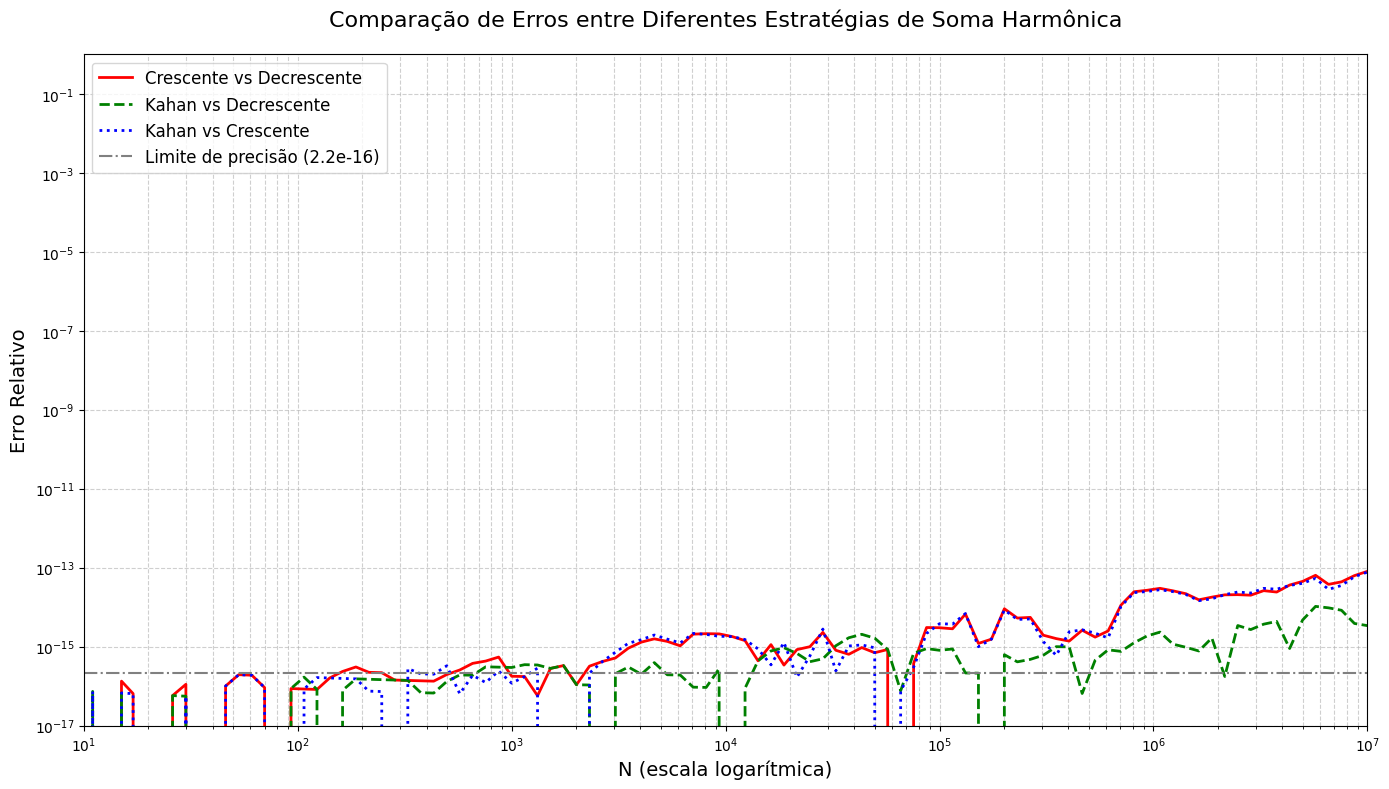

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Implementação das estratégias de soma
def soma_crescente(N, dtype=np.float64):
    total = dtype(0)
    for n in range(1, N+1):
        total += dtype(1) / dtype(n)
    return total

def soma_decrescente(N, dtype=np.float64):
    total = dtype(0)
    for n in range(N, 0, -1):
        total += dtype(1) / dtype(n)
    return total

def soma_kahan(N, dtype=np.float64):
    total = dtype(0)
    compensacao = dtype(0)
    for n in range(1, N+1):
        termo = dtype(1)/dtype(n) - compensacao
        temp = total + termo
        compensacao = (temp - total) - termo
        total = temp
    return total

# Valores para análise
N_print = [10, 100, 1000, 10000, 100000, 1000000]
print("N\t\tCrescente\t\tDecrescente\t\tKahan\t\tErro Cres/Dec\tErro Kahan/Dec\tErro Kahan/Cres")
print("--------------------------------------------------------------------------------------------------------")

for N in N_print:
    sc = soma_crescente(N)
    sd = soma_decrescente(N)
    sk = soma_kahan(N)
    
    erro_cres_dec = np.abs(sc - sd) / (np.abs(sc) + np.abs(sd))
    erro_kahan_dec = np.abs(sk - sd) / (np.abs(sk) + np.abs(sd))
    erro_kahan_cres = np.abs(sk - sc) / (np.abs(sk) + np.abs(sc))
    
    print(f"{N}\t\t{sc:.8f}\t{sd:.8f}\t{sk:.8f}\t{erro_cres_dec:.2e}\t{erro_kahan_dec:.2e}\t{erro_kahan_cres:.2e}")

# Preparação dos dados para o gráfico
N_values = np.logspace(1, 7, 100, dtype=int)
erros = {
    'Cres/Dec': [],
    'Kahan/Dec': [],
    'Kahan/Cres': []
}

for N in N_values:
    sc = soma_crescente(N)
    sd = soma_decrescente(N)
    sk = soma_kahan(N)
    
    erros['Cres/Dec'].append(np.abs(sc - sd)/(np.abs(sc) + np.abs(sd)))
    erros['Kahan/Dec'].append(np.abs(sk - sd)/(np.abs(sk) + np.abs(sd)))
    erros['Kahan/Cres'].append(np.abs(sk - sc)/(np.abs(sk) + np.abs(sc)))

# Configuração do gráfico
plt.figure(figsize=(14, 8))

# Cores e estilos para cada curva
cores = {
    'Cres/Dec': ('red', '-', 'Crescente vs Decrescente'),
    'Kahan/Dec': ('green', '--', 'Kahan vs Decrescente'),
    'Kahan/Cres': ('blue', ':', 'Kahan vs Crescente')
}

# Plotagem das curvas
for key in erros:
    cor, estilo, label = cores[key]
    plt.loglog(N_values, erros[key], color=cor, linestyle=estilo, linewidth=2, label=label)

# Linha de referência para precisão
plt.axhline(2.2e-16, color='gray', linestyle='-.', label='Limite de precisão (2.2e-16)')

# Ajustes finais
plt.xlabel('N (escala logarítmica)', fontsize=14)
plt.ylabel('Erro Relativo', fontsize=14)
plt.title('Comparação de Erros entre Diferentes Estratégias de Soma Harmônica', fontsize=16, pad=20)
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend(fontsize=12, loc='upper left')
plt.ylim(1e-17, 1)
plt.xlim(10, 1e7)
plt.tight_layout()

plt.show()